# Transfer learning
- Load pretrained base model

- Add your own top (classifier) layers

- Freeze the base model

- Train (learn only the new top layers)

- Unfreeze some top layers of the base model

- Re-compile

- Train again (fine-tuning)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# load the pretrained model
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

# freeze the top layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [3]:
# create and compile the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [4]:
# create placeholder images

import os
from PIL import Image
import numpy as np

# Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

# Create 10 sample images for each class
for i in range(10):
    # Create a blank white image for class_a
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    # Create a blank black image for class_b
    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")

Sample images created in 'sample_data/'


In [5]:
# load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 20 images belonging to 2 classes.


In [6]:
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

# Train the model
if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Epoch 1/10


c:\Users\ghummatova\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7461
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step - accuracy: 0.5000 - loss: 4.9050
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step - accuracy: 0.5000 - loss: 1.9605
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step - accuracy: 0.5000 - loss: 0.5867
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step - accuracy: 0.5000 - loss: 0.7857
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step - accuracy: 0.5000 - loss: 0.8094
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step - accuracy: 0.5000 - loss: 0.8161
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step - accuracy: 0.5000 - loss: 0.8103
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step - accuracy: 0.5000 - loss: 0.7951
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step - accuracy: 0.5000 - loss: 0.7736


# Fine tuning


In [7]:
# unfreeze the layers
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs = 10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7486
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.7415
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 1.3887
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6338
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 2.3430
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7719
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7192
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.8069
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0000e+00 - loss: 0.7127
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5000 - loss: 0.6836


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10


c:\Users\ghummatova\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 1.0386 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6903 - val_accuracy: 0.0000e+00 - val_loss: 0.6974
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.6974 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6851
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6851 - val_accuracy: 1.0000 - val_loss: 0.6674
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.6674 - val_accuracy: 0.5000 - val_loss: 0.6400
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.6400 - val_accuracy: 0.5000 - val_loss: 0.5557
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.5557 - val_accuracy: 0.5000 - val_loss: 0.4693
Epoch 9/10
1/1 ━━━━

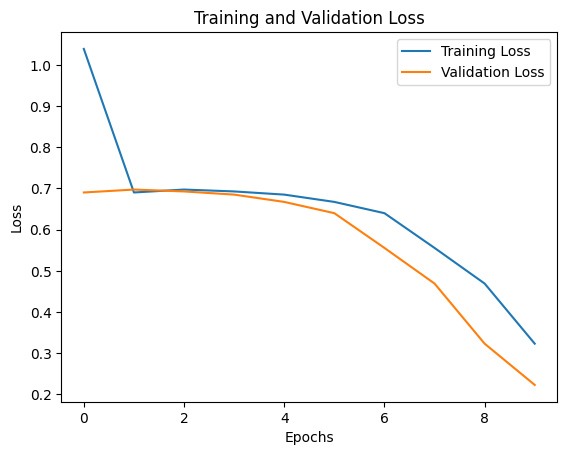

In [8]:
# visualize training and validation loss

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()